In [1]:
import numpy as np

In [2]:
X = np.array([60,5.6]).reshape(2,1)
X

array([[60. ],
       [ 5.6]])

In [162]:
Y = np.array([1]).reshape(1,1)
Y

array([[1]])

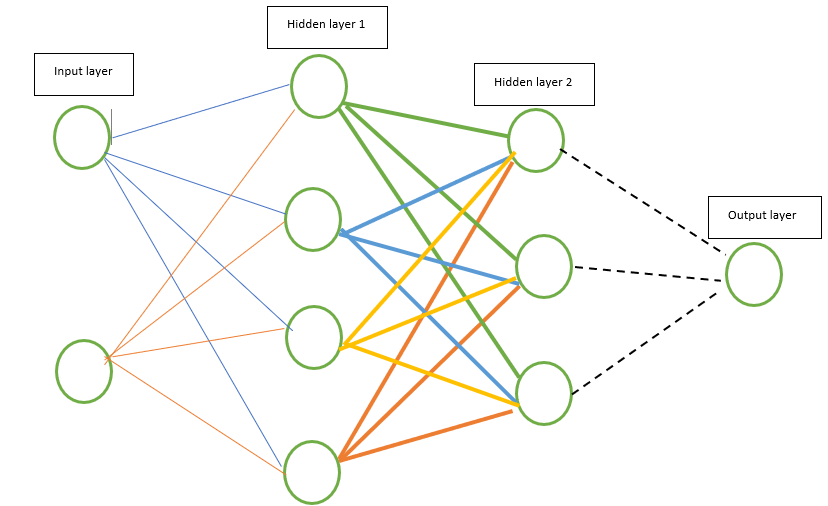

This will be the architecture of our neural network for now. 

Input layer (Lest-most side) with two neurons. The number of neurons in the input layer depends on the number of features in our dataset. For now, we have only 2 features i.e. weight and height.

1st Hidden layer with 4 neurons, 2nd hidden layer with 3 neurons, and 1 neuron for the output layer. 



# Manual approach: forward propagation

In [4]:
#initializing weights
def weight_initializer(shape0,shape1):
    return np.random.randn(shape1,shape0)*0.1 #randn creates an array of giving shape following normal distribution.

In [5]:
#bias initialize
def bias_initializer(shape0,shape1):
    return np.zeros((shape0,shape1))

In [6]:
#linear step
def linear_(W,X,b):
    return np.dot(W,X) + b

In [7]:
#sigmoid activation function
def sigmoid_activation(z):
    return 1/(1+np.exp(-z)) #np.exp allows to take array as well but math.exp only allows scalar number.

In [44]:
#binary crossentropy: since we are doing binary classification.
def loss(Y,yhat):
    m = Y.shape[1]
    return np.multiply(-1/m, (np.dot(Y,np.log(yhat)) + np.dot((1-Y),np.log(1-yhat))))

Below, I have printed the value and shape of each weight matrix to compare with the output of Dynamic approach.

In [9]:
#L1 (Input layer to 1st hidden layer) hidden layer with 4 neurons
np.random.seed(0)
W1 = weight_initializer(2,4)
b1 = bias_initializer(4,1)
z1 = linear_(W1,X,b1)
a1 = sigmoid_activation(z1)
print(W1)
print("The shape of W1:",W1.shape)

[[ 0.17640523  0.04001572]
 [ 0.0978738   0.22408932]
 [ 0.1867558  -0.09772779]
 [ 0.09500884 -0.01513572]]
The shape of W1: (4, 2)


In [10]:
#L2 (1st hidden layer to 2nd hidden layer)
W2 = weight_initializer(4,3)
b2 = bias_initializer(3,1)
z2 = linear_(W2,a1,b2)
a2 = sigmoid_activation(z2)
print(W2)
print("The shape of W2:",W2.shape)

[[-0.01032189  0.04105985  0.01440436  0.14542735]
 [ 0.07610377  0.0121675   0.04438632  0.03336743]
 [ 0.14940791 -0.02051583  0.03130677 -0.08540957]]
The shape of W2: (3, 4)


In [11]:
#L3 (2nd hidden layer to output layer)
W3 = weight_initializer(3,1)
b3 = bias_initializer(1,1)
z3 = linear_(W3,a2,b3)
a3 = sigmoid_activation(z3)
print(W3) #predicted value
print("The shape of W3:",W3.shape)


[[-0.25529898  0.06536186  0.08644362]]
The shape of W3: (1, 3)


In [12]:
loss_value = loss(Y,a3)
loss_value

array([[0.72334514]])

# Dynamic approach: Forward propagation

In [125]:
def initialize_parameter(a0,L):
    np.random.seed(0)
    L.insert(0,a0) #a0 has the value of the shape[0] of input data. This will be input layer in our neural network
    parameters = {}
    for i in range(1,len(L)):
        parameters['W'+str(i)] = np.random.randn(L[i],L[i-1])*0.1
        parameters['b'+str(i)] = np.zeros((L[i],1))   
    return parameters

In [126]:
def activation_functions(z,activation):
    
    if activation.lower() == 'relu':
        return np.where(0,z<0,z)
    
    elif activation.lower() == 'sigmoid':
        return 1/(1+np.exp(-z))
    
    else:
        print(f'The functionality for {activation} is be updated soon.')

In [136]:
def forward_pass(X,Y,L):
    linear_pass_output = {}
    X = X

    parameters = initialize_parameter(X.shape[0],L)
    
    layers = len(parameters)//2

    for i in range(1,layers): #using for loop to loop throug hidden layers only and applying relu activation function.
        
        W = parameters["W" + str(i)] #fetching the value of W from the dictionary.
        b = parameters["b" + str(i)] #fetching the value of b from the dictionary.
        z = np.dot(W,X) + b #linear pass
        a = activation_functions(z,'relu')
        
        X = a #assigning the value of every layer's output to X.Output of previous layer will be the input for the current layer
        
        linear_pass_output['z' + str(i)] = z #storing the values of every linear pass for backpropagation
        linear_pass_output['a' + str(i)] = a #storing the values of every activation's output for backpropagation
        
    W = parameters["W" + str(layers)] 
    b = parameters["b" + str(layers)]
    z = np.dot(W,X) + b #linear pass
    a = activation_functions(z,'sigmoid') #sigmoid activation function. #predicted value
    
    linear_pass_output['z' + str(layers)] = z #storing the values of every linear pass for backpropagation
    linear_pass_output['a' + str(layers)] = a #storing the values of every activation's output for backpropagation    
    caches = (parameters, linear_pass_output)
    return a,caches

In [160]:
L = [4,3,1]
yhat, caches = forward_pass(X,Y,L)
loss_val = loss(Y, yhat) #calculating the loss function
print(len(caches[1]))
# print(caches[1]['a1'])

6


In [144]:
def backprop_for_linear(dZ,caches):
    
    m = a.shape[1]
    dW = 1/m * np.dot(dZ,a.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims= True)
    dA_prev = np.dot(W.T,dZ) 

In [154]:
def backprop_for_activation(f,activation):
    if activation == 'relu':
        return np.where(0, f<0, 1)
    else:
        return f * (1-f)

In [170]:
def backpropagation(Y,a,caches):
    
    grads = {}
    length = len(caches[0])//2
    m = a.shape[1]
    
    
    dL = -(np.divide(Y,a) - np.divide((1-Y),(1-a))) #derivation of binary cross entropy
    
    #derivation for output layer (sigmoid)
    
    
    print(length)
    
    for i in range(1,length+1):
        
    
    
    
    

In [171]:
backpropagation(Y,yhat,caches)

3


# Manual approach: Back Propagation

In [22]:
#derivation of loss function
def bprop_loss(Y,yhat):
    return np.divide(-Y, yhat) + np.divide((1-Y),(1-yhat))

In [23]:
def bprop_sigmoid(z):
    return sigmoid_activation(z) * (1 - sigmoid_activation(z))

In [24]:
def bprop_weight(z):
    return a

In [25]:
def b

SyntaxError: invalid syntax (Temp/ipykernel_9668/3483032952.py, line 1)